In [99]:
import os
import numpy as np
import json

import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 16})

In [104]:
f=open('logs_15.07/1.0lr_0.01reg.txt').readlines()
with open('logs_15.07/1.0lr_0.01reg.txt','w') as F:
    F.writelines(f[0:10000])

# Let's appload and split logs

In [105]:
with open("config.conf", "r") as f_json:
    config = json.loads(f_json.read())
for_graphics = {}
file_names_eff = []
file_names_sched = []
for i in range(1, config["num_exp"]+1):
    config_ = config["experiments"][f"exp{i}"]
    
    if config_["sched"]:
        log_name = f'logs_15.07/{config_["optim"]}_{config_["sched"]}_0.1lr_{config_["reg"]}reg.txt'
        var_name = f'{config_["optim"]}_{config_["sched"]}_{config_["reg"]}reg'
        file_names_sched.append(var_name)
    else:
        log_name = f'logs_15.07/{config_["lr"]}lr_{config_["reg"]}reg.txt'
        var_name = f'{config_["lr"]}lr_{config_["reg"]}reg'
        file_names_eff.append(var_name)
    
    with open(log_name, 'r') as f:
        for_graphics[var_name] = f.read()
    
    for_graphics['test_%s' % var_name] = []
    for_graphics['train_%s' % var_name] = []
    for_graphics['lrs_%s' % var_name] = []
    for_graphics['loss_%s' % var_name] = []

    for string in for_graphics[var_name].split('\n')[:-1]:
        splitted = string.split(' ')

        for_graphics['loss_%s' % var_name].append(float(splitted[0]))
        for_graphics['train_%s' % var_name].append(float(splitted[1]))
        for_graphics['test_%s' % var_name].append(float(splitted[2]))
        for_graphics['lrs_%s' % var_name].append(float(splitted[3]))
        
    if len(for_graphics['loss_%s' % var_name])==20000:
        print(var_name)


## Let's build plots!

## Comparing test accuracies

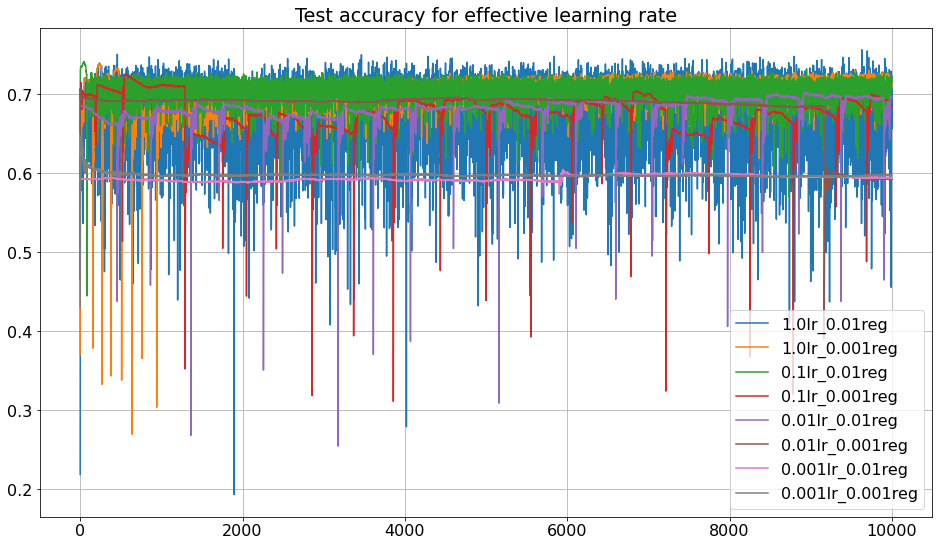

In [116]:
plt.figure(figsize=(16, 9))
plt.title("Test accuracy for effective learning rate")
plt.grid()

for i, var_name in enumerate(file_names_eff):
    plt.plot(for_graphics['test_%s' % var_name])
#     if i==5:
#         break

plt.legend(file_names_eff)

plt.show()

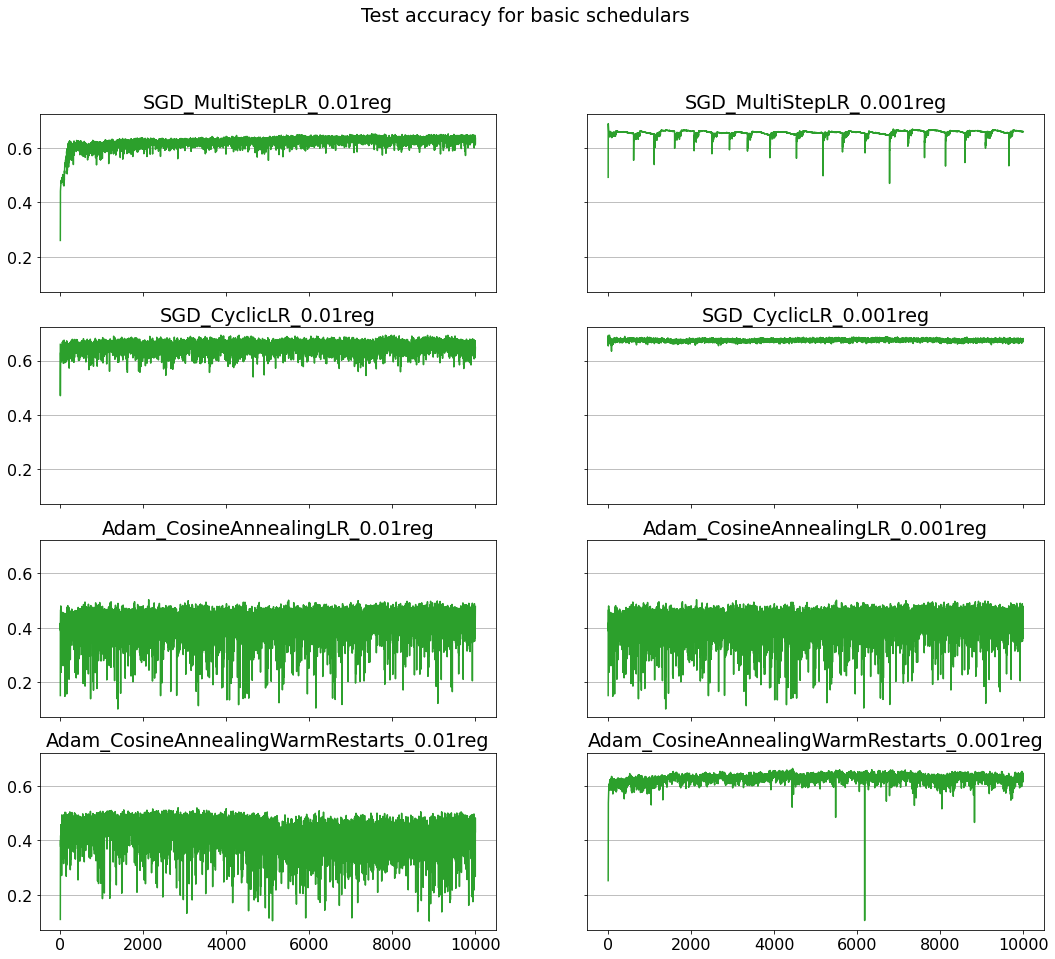

In [102]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey=True)
fig.suptitle("Test accuracy for basic schedulars")


axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i, var_name in enumerate(file_names_sched):
    axs[i].plot(for_graphics['test_%s' % var_name], 'tab:green')
    axs[i].grid(axis = 'y')
    axs[i].set_title(file_names_sched[i])

fig.set_figwidth(18)
fig.set_figheight(15)

for ax in fig.get_axes():
    ax.label_outer()

## Test accurasies are better with effective learning rate shedular but it is't stable. And ordinary schedulars need validation for hyper parameters.

# Comparing train accuracies

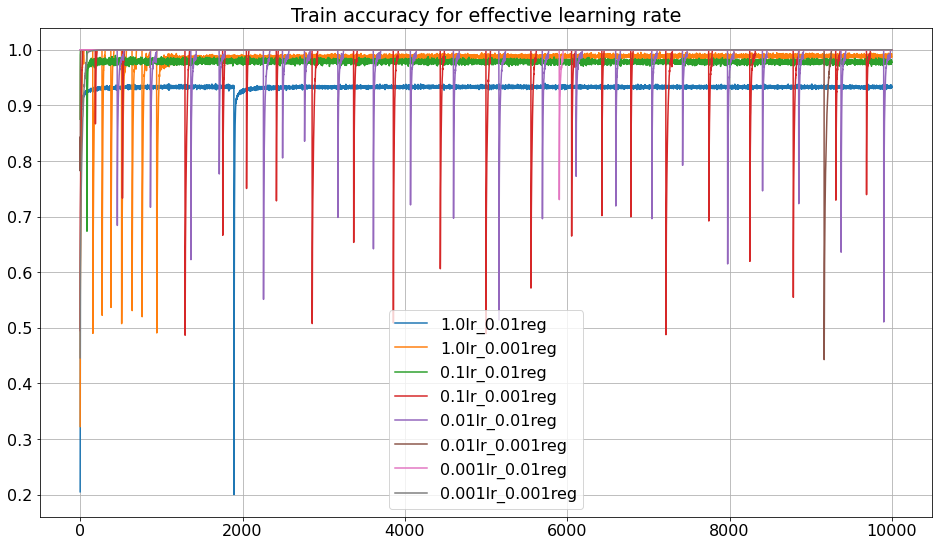

In [107]:
plt.figure(figsize=(16, 9))
plt.title("Train accuracy for effective learning rate")
plt.grid()

for var_name in file_names_eff:
    plt.plot(for_graphics['train_%s' % var_name])

plt.legend(file_names_eff)

plt.show()

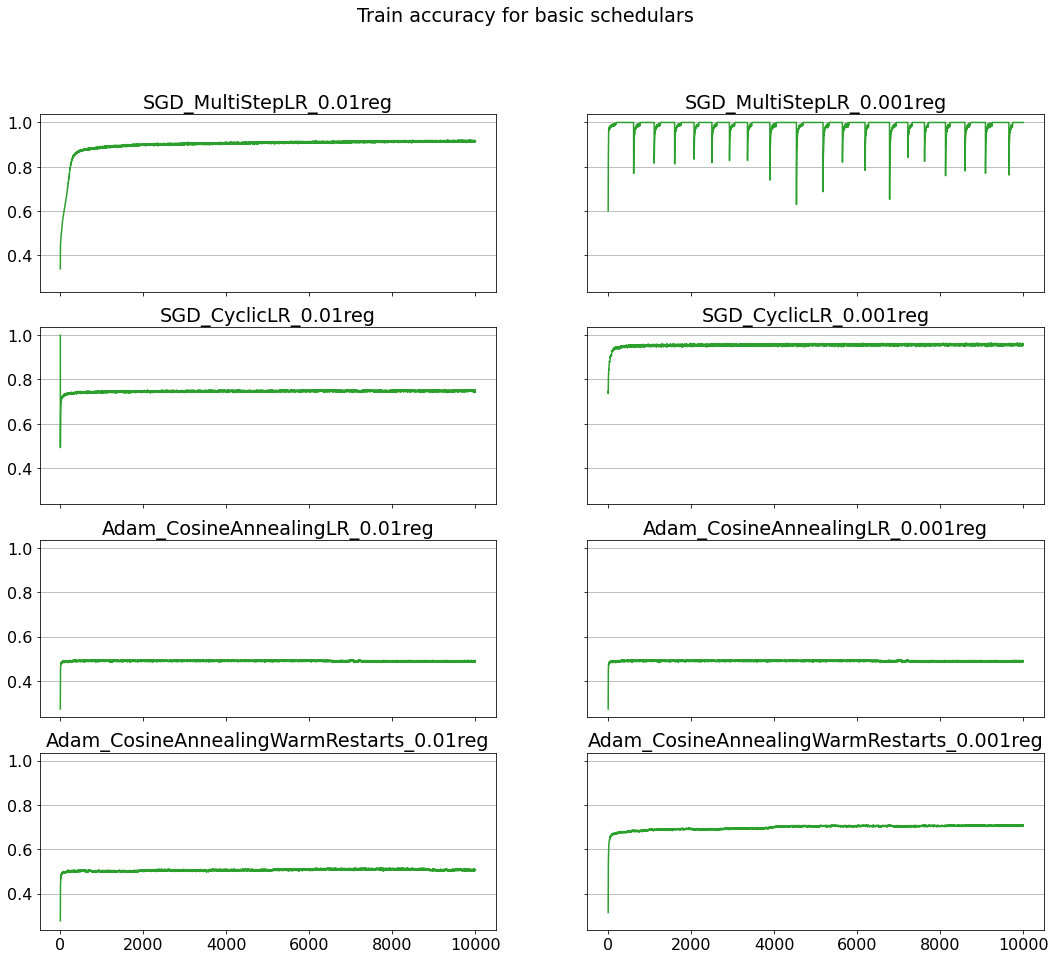

In [91]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, sharey=True)
fig.suptitle("Train accuracy for basic schedulars")


axs = [ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

for i, var_name in enumerate(file_names_sched):
    axs[i].plot(for_graphics['train_%s' % var_name], 'tab:green')
    axs[i].grid(axis = 'y')
    axs[i].set_title(file_names_sched[i])

fig.set_figwidth(18)
fig.set_figheight(15)

for ax in fig.get_axes():
    ax.label_outer()

## As we can see above, schedular with effective learning rate has higher train accuracies.

# Train losses

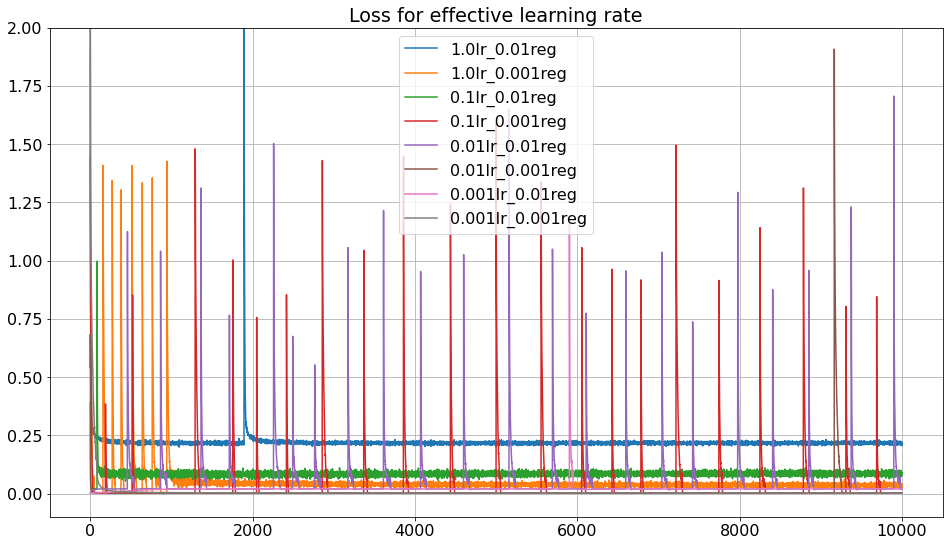

In [108]:
plt.figure(figsize=(16, 9))
plt.title("Loss for effective learning rate")
plt.grid()

for var_name in file_names_eff:
    plt.plot(for_graphics['loss_%s' % var_name])

plt.legend(file_names_eff)
plt.ylim([-0.1, 2])

plt.show()

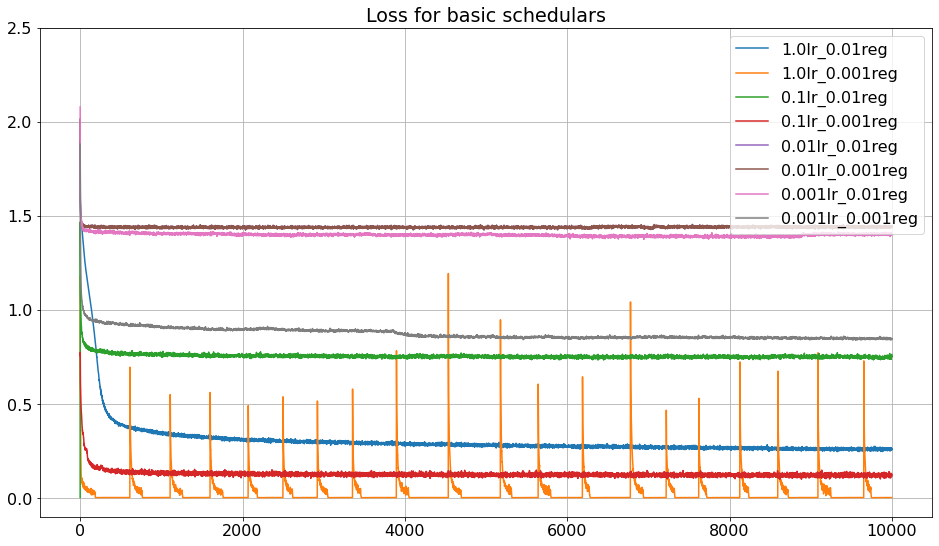

In [109]:
plt.figure(figsize=(16, 9))
plt.title("Loss for basic schedulars")
plt.grid()

for var_name in file_names_sched:
    plt.plot(for_graphics['loss_%s' % var_name])

plt.legend(file_names_eff)
plt.ylim([-0.1, 2.5])

plt.show()

## However loss plots show shedular with effective learning rate leads to overfitting. 

# Learning rate

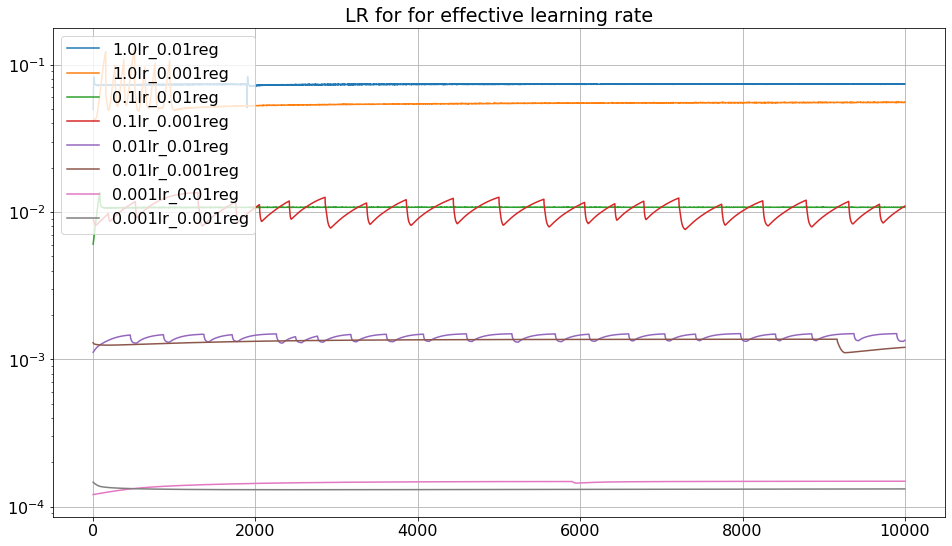

In [112]:
plt.figure(figsize=(16, 9))
plt.title("LR for for effective learning rate")
plt.grid()

for var_name in file_names_eff:
    plt.plot(for_graphics['lrs_%s' % var_name])

plt.legend(file_names_eff)

plt.yscale('log')

plt.show()

## We haven't reached supposed effect which leads to finding trully effective learniung rate. When all values of beginning learning rate shows approximetelly the same values after 10k epochs. On the contrary, they do not converge at all and do not change values during the entire training. Hovewer I have studied how to state hypotesis and how to check it due to a lot of experiments. 